In [93]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Open the CSV file contaning the dataset
datei = pd.read_csv("/home/andre/Desktop/ciência de dados - bootcamp/exercicio/stroke_data.csv")

In [95]:
# Show the first five registers from dataframe.
datei.head()

,0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,Female,18.0,0,0,No,Private,Urban,94.19,12.12,smokes,1
1,2,Male,58.0,1,0,Yes,Private,Rural,154.24,33.70,never_smoked,0
2,3,Female,36.0,0,0,Yes,Govt_job,Urban,72.63,24.70,smokes,0
3,4,Female,62.0,0,0,Yes,Self-employed,Rural,85.52,31.20,formerly smoked,0
4,5,Female,82.0,0,0,Yes,Private,Rural,59.32,33.20,smokes,1


In [96]:
# Return a tuple representing the dimensionality of the DataFrame.
datei.shape

(67135, 12)

In [97]:
# Show the column labels of the DataFrame.
datei.columns # These dataframe contain 12 columns

Index(['0', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [98]:
# Generate descriptive statistics from dataframe.
datei.describe() # Seven columns are numerical

,0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000,67135.000000
mean,33568.000000,51.959508,0.164102,0.101423,113.414396,29.161540,0.600089
std,19380.349498,23.413054,0.370371,0.301890,51.258817,7.102057,0.489883
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,16784.500000,35.000000,0.000000,0.000000,78.370000,24.400000,0.000000
50%,33568.000000,56.000000,0.000000,0.000000,94.160000,28.800000,1.000000
75%,50351.500000,73.000000,0.000000,0.000000,126.460000,32.600000,1.000000
max,67135.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [99]:
# Select the rows containing only the people that suffered stroke
stroke_people = datei.loc[datei['stroke'] == 1]

In [100]:
# Finding the number of people that suffered stroke
stroke_people.count()[0]

40287

In [101]:
# Select the rows containing only the people that not suffered stroke
no_stroke_people = datei.loc[datei['stroke'] == 0]
# Finding the number of people that not suffered stroke
no_stroke_people.count()[0]

26848

In [102]:
# Estimating the percentage for people that suffered and not suffered stroke
stroke_people_percentage = (stroke_people.count()[0]/datei.count()[0])*100
print('People that suffered stroke (%): ', stroke_people_percentage)
no_stroke_people_percentage = (no_stroke_people.count()[0]/datei.count()[0])*100
print('People that not suffered stroke (%): ', no_stroke_people_percentage)

People that suffered stroke (%):  60.0089372160572
People that not suffered stroke (%):  39.9910627839428


In [103]:
# Function to analyse the significance between data by Student's t-Test
from scipy.stats import ttest_ind

def student_t_test(sample1, sample2): 
    t_stat, p_value = ttest_ind(sample1, sample2)
    print("T-statistic value: ", t_stat)  
    print("P-Value: ", p_value)
    if p_value <= 0.5:
        print("There is statistical differences between the data")
    else:
        print("There is not statistical differences between the data")    

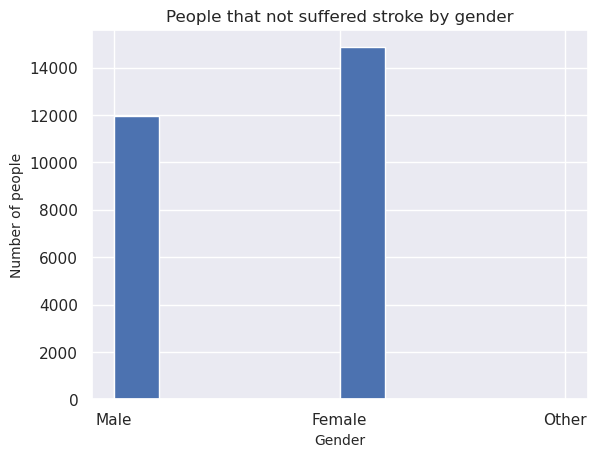

In [104]:
# Draw a histogram with the people that not suffered stroke by gender
plt.hist(no_stroke_people['gender']); # hist. Compute and plot a histogram
plt.title('People that not suffered stroke by gender')
plt.ylabel('Number of people', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.show() # show() Display all open figures

In [105]:
# Stroke occurrences in all the work types of these dataset
# unique() Return unique values based on a hash table.
datei['work_type'].unique() # There are five work types found in this dataset

array(['Private', 'Govt_job', 'Self-employed', 'children', 'Never_worked'],
      dtype=object)

In [106]:
# Getting the number of peoples that suffered stroke and are in work private
private = datei[(datei.work_type=='Private') & (datei.stroke==1)].count()[0]
private

23711

In [107]:
# Getting the number of peoples that suffered stroke and are in work private
private1 = datei[(datei.work_type=='Private') & (datei.stroke==1)].count()
private1
# Observe that in this case, it does not used [0] together with the count(), then it show all the details.

0                    23711
gender               23711
age                  23711
hypertension         23711
heart_disease        23711
ever_married         23711
work_type            23711
Residence_type       23711
avg_glucose_level    23711
bmi                  23711
smoking_status       23711
stroke               23711
dtype: int64

In [108]:
# Getting the number of children that suffered stroke 
children = datei[(datei.work_type == 'children') & (datei.stroke==1)].count()[0]
children

520

In [109]:
# Getting the number of peoples that suffered stroke and are self-employed
independente = datei[(datei.work_type=='Self-employed') & (datei.stroke==1)].count()[0]
independente

10807

In [110]:
# Getting the number of peoples that suffered stroke and are government employment
governo = datei[(datei.work_type == 'Govt_job') & (datei.stroke==1)].count()[0]
governo

5164

In [111]:
# Another way to do the same thing as above
governo = datei[(datei.work_type == 'Govt_job') & (datei.stroke==1)].count()
governo['work_type']

5164

In [112]:
# Selecting the variables filtered: peoples in different work types that suffered stroke
gov = datei[(datei.work_type == 'Govt_job') & (datei.stroke==1)]
pri = datei[(datei.work_type=='Private') & (datei.stroke==1)]
ind = datei[(datei.work_type=='Self-employed') & (datei.stroke==1)]
chi = datei[(datei.work_type == 'children') & (datei.stroke==1)]
ntr = datei[(datei.work_type == 'Never_worked') & (datei.stroke==1)]

In [113]:
# Put the values in a list
x = [gov['work_type'], pri['work_type'], ind['work_type'], chi['work_type'], ntr['work_type']]

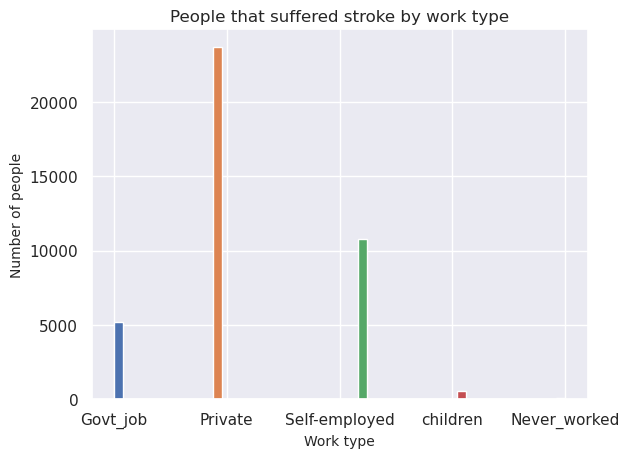

In [114]:
# Draw a histogram with the people that suffered stroke by work type
plt.hist(x, rwidth=1); # hist. Compute and plot a histogram
plt.title('People that suffered stroke by work type')
plt.ylabel('Number of people', fontsize=10)
plt.xlabel('Work type', fontsize=10)
plt.show() # show() Display all open figures

In [115]:
# Determining the proportion, by gender, of study participants
gender = datei['gender'].unique() # Gender occurrences in these dataset
gender

array(['Female', 'Male', 'Other'], dtype=object)

In [116]:
# Getting the number of women  
Female = datei.loc[datei['gender']=='Female'].count()[0]
Female

39530

In [117]:
# Getting the number of men
Male = datei.loc[datei['gender']=='Male'].count()[0]
Male

27594

In [118]:
# Getting the number of other types of gender
Other = datei.loc[datei['gender']=='Other'].count()[0]
Other

11

In [119]:
# Number of hypertensive people and non-hypertensive people that suffered stroke
hipertenso = datei[(datei.hypertension==1) & (datei.stroke==1)].count()[0]
print("Number of hypertensive people: ",hipertenso)
non_hipertenso = datei[(datei.hypertension==0) & (datei.stroke==1)].count()[0]
print("Number of non-hypertensive people: ",non_hipertenso)

Number of hypertensive people:  8817
Number of non-hypertensive people:  31470


In [120]:
# Preparing the data to use in Student's t-test to evaluate the effect of average glucose level in hypertensive and non-hypertensive people that suffered stroke 
hipertenso1 = datei[(datei.hypertension==1) & (datei.stroke==1)]
hipertenso1['avg_glucose_level']
non_hipertenso1 = datei[(datei.hypertension==0) & (datei.stroke==1)]
non_hipertenso1['avg_glucose_level']

0         94.19
4         59.32
7        156.70
8         64.06
9         76.34
          ...  
67129     86.36
67130    109.06
67132    141.18
67133    199.71
67134    202.96
Name: avg_glucose_level, Length: 31470, dtype: float64

In [121]:
# Estimanting the Student's t-test
student_t_test(hipertenso1['avg_glucose_level'], non_hipertenso1['avg_glucose_level'])

T-statistic value:  24.11055604421617
P-Value:  1.5574128115972376e-127
There is statistical differences between the data


In [122]:
# Showing averages of the mean glucose level found in hypertensive and non-hypertensive people who have had a stroke
print('Average glucose level in hypertensive people that suffered stroke...: ', round(hipertenso1['avg_glucose_level'].mean(),2)) 
print('Average glucose level in non-hypertensive people that suffered stroke...: ', round(non_hipertenso1['avg_glucose_level'].mean(),2))

Average glucose level in hypertensive people that suffered stroke...:  132.46
Average glucose level in non-hypertensive people that suffered stroke...:  116.45


### Determining the number of people who had a stroke by age. Finding the age with the largest number of people in the dataset who had a stroke.

In [123]:
# Determining the unique occurrences of ages of dataset
datei['age'].unique()

array([1.80e+01, 5.80e+01, 3.60e+01, 6.20e+01, 8.20e+01, 3.30e+01,
       3.70e+01, 4.10e+01, 7.00e+01, 2.50e+01, 4.30e+01, 7.20e+01,
       2.00e+01, 2.30e+01, 2.20e+01, 6.90e+01, 4.40e+01, 1.60e+01,
       6.40e+01, 7.80e+01, 7.90e+01, 5.10e+01, 8.10e+01, 1.00e+01,
       6.30e+01, 8.00e+01, 5.60e+01, 3.80e+01, 4.80e+01, 5.90e+01,
       7.70e+01, 6.70e+01, 6.60e+01, 4.60e+01, 5.60e-01, 1.20e+01,
       5.30e+01, 3.40e+01, 6.00e+01, 7.60e+01, 5.70e+01, 7.50e+01,
       2.60e+01, 1.70e+01, 7.30e+01, 4.50e+01, 5.00e+01, 5.00e+00,
       2.10e+01, 2.70e+01, 7.40e+01, 1.16e+00, 3.90e+01, 3.00e+00,
       5.40e+01, 3.20e+01, 6.50e+01, 3.00e+01, 8.00e+00, 2.80e+01,
       1.10e+01, 2.90e+01, 4.70e+01, 7.00e+00, 2.00e+00, 4.90e+01,
       1.90e+01, 6.10e+01, 3.50e+01, 4.00e+01, 3.10e+01, 1.30e+01,
       5.50e+01, 5.20e+01, 2.40e+01, 1.40e+01, 6.00e+00, 7.10e+01,
       4.20e+01, 9.00e+00, 6.80e+01, 1.50e+01, 8.00e-01, 4.00e+00,
       1.48e+00, 4.00e-01, 1.08e+00, 1.24e+00, 1.56e+00, 1.64e

In [124]:
# Count number of distinct elements in specified axis.
datei['age'].nunique() # There are 104 ages in dataset

104

In [125]:
# Pandas tolist() is used to convert a series to list.
idade = datei['age'].unique().tolist()
# The enumerate() function takes a collection (e.g. a tuple) and returns it as an enumerate object.
numerar = enumerate(idade)

In [126]:
# In order to correrct this TypeError: 'enumerate' object is not subscriptable
# we must to transform to list
lista_numerada = list(numerar)
lista_numerada

[(0, 18.0),
 (1, 58.0),
 (2, 36.0),
 (3, 62.0),
 (4, 82.0),
 (5, 33.0),
 (6, 37.0),
 (7, 41.0),
 (8, 70.0),
 (9, 25.0),
 (10, 43.0),
 (11, 72.0),
 (12, 20.0),
 (13, 23.0),
 (14, 22.0),
 (15, 69.0),
 (16, 44.0),
 (17, 16.0),
 (18, 64.0),
 (19, 78.0),
 (20, 79.0),
 (21, 51.0),
 (22, 81.0),
 (23, 10.0),
 (24, 63.0),
 (25, 80.0),
 (26, 56.0),
 (27, 38.0),
 (28, 48.0),
 (29, 59.0),
 (30, 77.0),
 (31, 67.0),
 (32, 66.0),
 (33, 46.0),
 (34, 0.56),
 (35, 12.0),
 (36, 53.0),
 (37, 34.0),
 (38, 60.0),
 (39, 76.0),
 (40, 57.0),
 (41, 75.0),
 (42, 26.0),
 (43, 17.0),
 (44, 73.0),
 (45, 45.0),
 (46, 50.0),
 (47, 5.0),
 (48, 21.0),
 (49, 27.0),
 (50, 74.0),
 (51, 1.16),
 (52, 39.0),
 (53, 3.0),
 (54, 54.0),
 (55, 32.0),
 (56, 65.0),
 (57, 30.0),
 (58, 8.0),
 (59, 28.0),
 (60, 11.0),
 (61, 29.0),
 (62, 47.0),
 (63, 7.0),
 (64, 2.0),
 (65, 49.0),
 (66, 19.0),
 (67, 61.0),
 (68, 35.0),
 (69, 40.0),
 (70, 31.0),
 (71, 13.0),
 (72, 55.0),
 (73, 52.0),
 (74, 24.0),
 (75, 14.0),
 (76, 6.0),
 (77, 71.0),
 (

In [127]:
soma_d = {} # Creates a dictionary to store the age and their corresponding  amount of stroke people

for m in range(datei['age'].nunique()):
    soma_d[lista_numerada[m][1]]=datei[(datei.age == lista_numerada[m][1]) & datei.stroke==1].count()[0]
    print("Number of people that suffered stroke with ", lista_numerada[m][1], "years old :")
    print(datei[(datei.age == lista_numerada[m][1]) & datei.stroke==1].count()[0])
    

Number of people that suffered stroke with  18.0 years old :
218
Number of people that suffered stroke with  58.0 years old :
645
Number of people that suffered stroke with  36.0 years old :
293
Number of people that suffered stroke with  62.0 years old :
550
Number of people that suffered stroke with  82.0 years old :
1427
Number of people that suffered stroke with  33.0 years old :
296
Number of people that suffered stroke with  37.0 years old :
260
Number of people that suffered stroke with  41.0 years old :
324
Number of people that suffered stroke with  70.0 years old :
881
Number of people that suffered stroke with  25.0 years old :
226
Number of people that suffered stroke with  43.0 years old :
407
Number of people that suffered stroke with  72.0 years old :
709
Number of people that suffered stroke with  20.0 years old :
263
Number of people that suffered stroke with  23.0 years old :
253
Number of people that suffered stroke with  22.0 years old :
242
Number of people that su

In [128]:
# Listing the dictionary showing the age and their corresponding amount of the stroke people
soma_d

{18.0: 218,
 58.0: 645,
 36.0: 293,
 62.0: 550,
 82.0: 1427,
 33.0: 296,
 37.0: 260,
 41.0: 324,
 70.0: 881,
 25.0: 226,
 43.0: 407,
 72.0: 709,
 20.0: 263,
 23.0: 253,
 22.0: 242,
 69.0: 677,
 44.0: 292,
 16.0: 187,
 64.0: 376,
 78.0: 2279,
 79.0: 2916,
 51.0: 643,
 81.0: 1738,
 10.0: 62,
 63.0: 942,
 80.0: 1858,
 56.0: 569,
 38.0: 456,
 48.0: 490,
 59.0: 647,
 77.0: 994,
 67.0: 801,
 66.0: 848,
 46.0: 471,
 0.56: 0,
 12.0: 119,
 53.0: 409,
 34.0: 289,
 60.0: 579,
 76.0: 892,
 57.0: 775,
 75.0: 809,
 26.0: 234,
 17.0: 227,
 73.0: 759,
 45.0: 513,
 50.0: 503,
 5.0: 0,
 21.0: 290,
 27.0: 231,
 74.0: 987,
 1.16: 0,
 39.0: 295,
 3.0: 0,
 54.0: 544,
 32.0: 223,
 65.0: 716,
 30.0: 223,
 8.0: 0,
 28.0: 218,
 11.0: 95,
 29.0: 306,
 47.0: 472,
 7.0: 0,
 2.0: 0,
 49.0: 315,
 19.0: 243,
 61.0: 646,
 35.0: 281,
 40.0: 266,
 31.0: 248,
 13.0: 131,
 55.0: 387,
 52.0: 580,
 24.0: 228,
 14.0: 166,
 6.0: 0,
 71.0: 667,
 42.0: 318,
 9.0: 0,
 68.0: 688,
 15.0: 174,
 0.8: 0,
 4.0: 0,
 1.48: 0,
 0.4: 0,
 

In [129]:
# Getting the largest amount of people stroke 
max(soma_d.values())

2916

In [130]:
# Dictionary elements are not accessed by numerical index, like soma_d[1]

In [131]:
positions = list(soma_d.values()) # Converting values in a list
chave = list(soma_d.keys()) # Converting keys in a list

for z in range(datei['age'].nunique()):
    if positions[z] == 2916: # 2916 is the largest number of stroke people
        print("The age corresponding to the largest number of stroke people is: ", chave[z])

The age corresponding to the largest number of stroke people is:  79.0


In [132]:
# The get() method returns the value of the item with the specified key.
corresponding_age = soma_d.get(82.0)
print(corresponding_age)

1427


In [133]:
# The Python __sizeof__() method returns the size of the object in bytes. 
soma_d.__sizeof__()

4680

In [134]:
soma_d.clear() # The clear() method removes all the elements from a dictionary.

### Linear regression - Stroke and age

In [135]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression  
from sklearn import metrics 

In [136]:
# reshape. Gives a new shape to an array without changing its data.
y = np.array(positions).reshape(-1,1) # Performs data modification for the algorithm input (converts it into a matrix)  
X = np.array(chave).reshape(-1,1) # Performs data modification for the algorithm input (converts it into a matrix)  

In [137]:
# Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # train (80%) and test (20%)

In [138]:
regressor = LinearRegression() # Object for building the linear regression model
regressor.fit(X_train, y_train) # Algorithm training

LinearRegression()

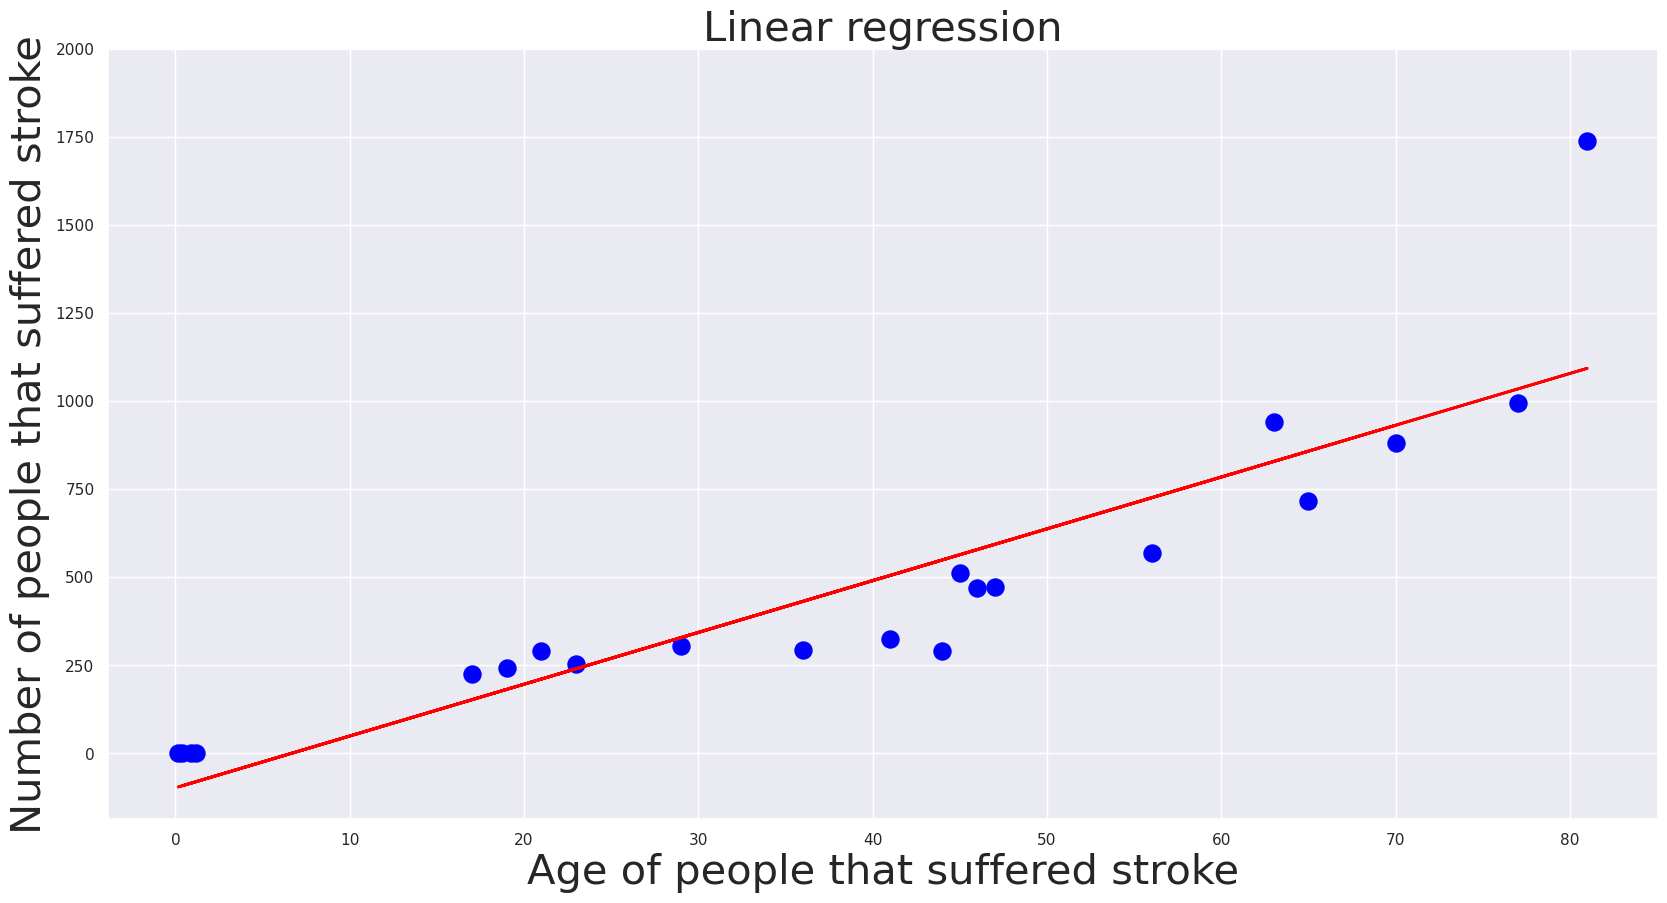

In [139]:
plt.figure(figsize=(20,10))

y_pred = regressor.predict(X_test)  # Predict the regression model

plt.scatter(X_test, y_test, color='blue', s=150) # s=150 Changing Marker Sizes for All Points

plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.ylabel('Number of people that suffered stroke', fontsize=30)
plt.xlabel('Age of people that suffered stroke', fontsize=30)
plt.title('Linear regression', fontsize=30)

# rc (runtime configuration) 
plt.rcParams['xtick.labelsize'] = 30  # It changes the letter size
plt.rcParams['ytick.labelsize'] = 30  # It changes the letter size

plt.rcParams.update({'font.size': 40})

# adjust the top leaving bottom unchanged
plt.ylim(top=2000)

plt.show()

In [140]:
# Estimating the coefficient of determination R2 for the model
from sklearn.metrics import r2_score  
r2_score(y_test,y_pred)

0.8093924396269894

In [141]:
# Line coefficients
print("The equation of the line is Y = {}*X {}".format(regressor.coef_[0],regressor.intercept_[0]))

The equation of the line is Y = [14.70962255]*X -97.58113729998729


In [142]:
# Number of people with stroke estimated for age 79 years
regressor.predict(np.array([79]).reshape(-1,1))

array([[1064.47904426]])

In [143]:
# Import a Python data visualization library based on matplotlib. 
import seaborn as sns

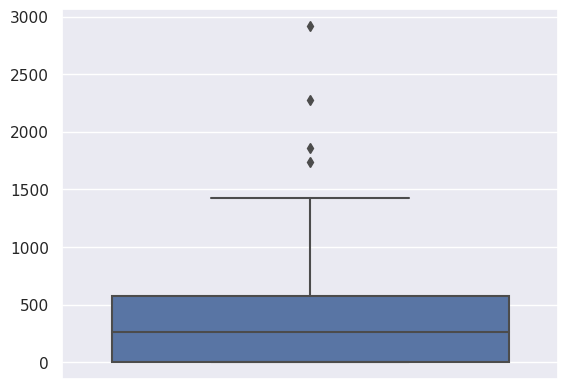

In [144]:
# Note the four outliers that were removed in linear equation model. 
sns.set(font_scale=1) # Set the font size in seaborn
sns.boxplot(y=positions); # Creates a box plot for number os people that suffered stroke

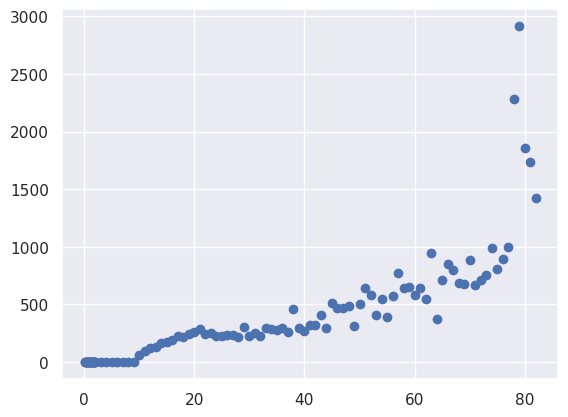

In [145]:
# All observed values in the number of people that suffered stroke
plt.scatter(chave, positions);